In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Wage.csv")

In [3]:
df.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


## To know more about Data:

In [4]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [5]:
df.shape

(3000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [7]:
df.dtypes

year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

## Nulls & Missing values:

In [8]:
df.isnull().sum()

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

##### This data has no null values.

In [9]:
df.isin({"?", "NA", "NAN", "0", "N/A"}).sum()

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

#### Tha data has no missing values

<AxesSubplot:>

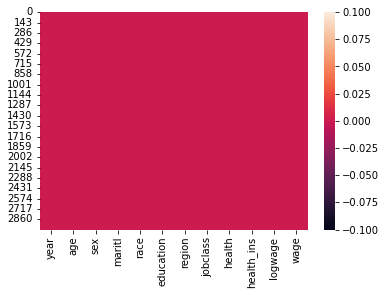

In [10]:
sns.heatmap(df.isnull())

## Outliers:

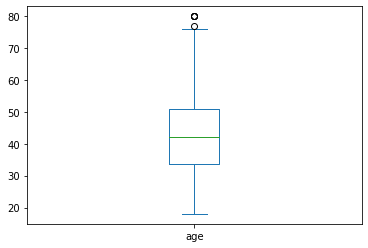

In [11]:
df["age"].plot(kind = "box")
plt.show()

### the "age" column has outliers.

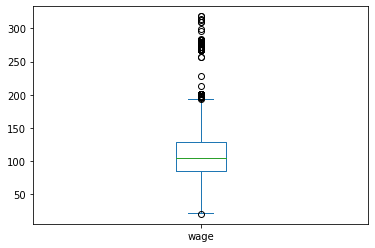

In [12]:
df["wage"].plot(kind = "box")
plt.show()

### the "wage" column has outliers.

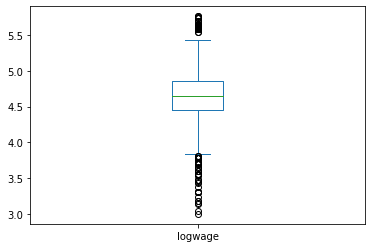

In [13]:
df["logwage"].plot(kind = "box")
plt.show()

### the "logwage" column has outliers.

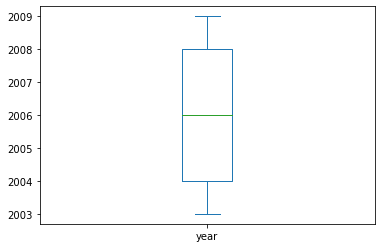

In [14]:
df["year"].plot(kind = "box")
plt.show()

### the "year" column has no outliers.

## Handling the outliers:

In [15]:
df["age_af"] =np.sqrt(df["age"])

In [16]:
df["age"].mean()

42.41466666666667

In [17]:
df["age_af"].mean()

6.449949685681987

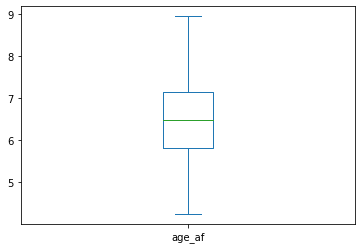

In [18]:
df["age_af"].plot(kind = "box")
plt.show()

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


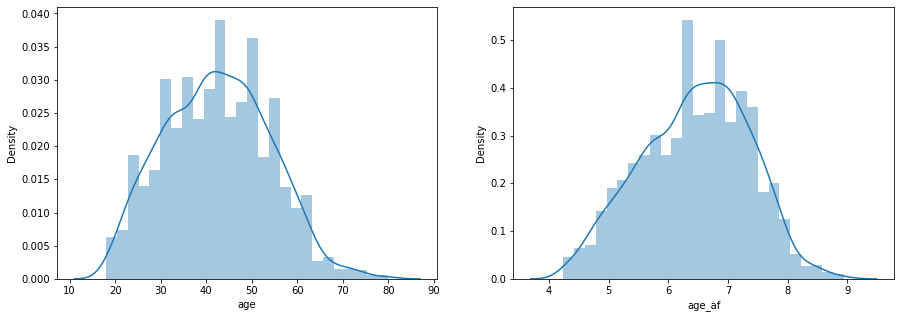

In [19]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(df["age"], ax = axes[0])
sns.distplot(df["age_af"], ax = axes[1])
plt.show()

### same skew!!

In [20]:
df["wage_af"] =np.sqrt(df["wage"])

In [21]:
df["wage"].mean()

111.70360819714259

In [22]:
df["wage_af"].mean()

10.405839038647025

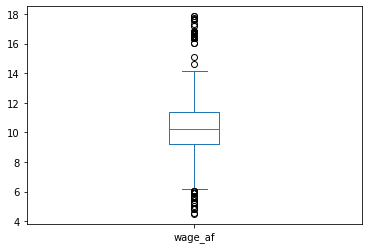

In [23]:
df["wage_af"].plot(kind = "box")
plt.show()

### this way not effective

In [24]:
df["age_log"] = np.log(df["age"])

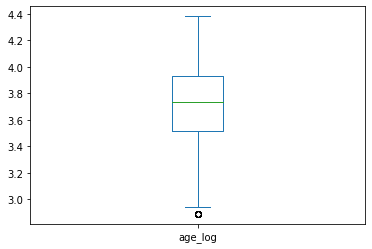

In [25]:
df["age_log"].plot(kind = "box")
plt.show()

In [26]:
df["wage_log"] = np.log(df["wage"])

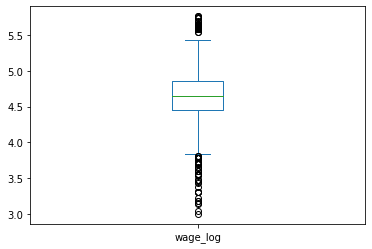

In [27]:
df["wage_log"].plot(kind = "box")
plt.show()

### not effective neither

In [28]:
# Q1 = df.age.quantile(0.25)
# Q2 = df.age.quantile(0.50)
# Q3 = df.age.quantile(0.75)

# IQR = Q3-Q1
# LC = Q1 - (1.5*IQR)
# UC = Q3 + (1.5*IQR)

# display(LC)
# display(UC)

In [29]:
## find count of outliers wrt IQR

# df[(df.age<LC) | (df.age>UC)].reset_index(drop = True)

In [30]:
# df[(df.age<LC) | (df.age>UC)].shape[0]

In [31]:
# df["age"].plot(kind = "box")
# plt.show()

In [32]:
# Q1 = df.wage.quantile(0.25)
# Q2 = df.wage.quantile(0.50)
# Q3 = df.wage.quantile(0.75)

# IQR = Q3-Q1
# LC = Q1 - (1.5*IQR)
# UC = Q3 + (1.5*IQR)

# display(LC)
# display(UC)

In [33]:
# df[(df.wage<LC) | (df.wage>UC)].reset_index(drop = True)

In [34]:
# df[(df.wage<LC) | (df.wage>UC)].shape[0]

In [35]:
# df["wage"].plot(kind = "box")
# plt.show()

In [46]:
def treat_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df1 = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)].copy()
    df1.reset_index(drop=True, inplace=True)
    
    return df1

In [47]:
df1 = treat_outliers(df,"age") 

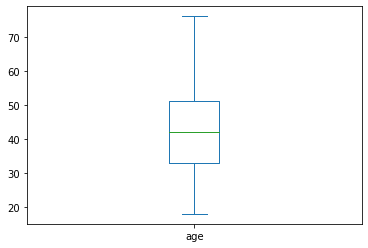

In [48]:
df1["age"].plot(kind = "box")
plt.show()

In [49]:
df1 = treat_outliers(df,"wage")

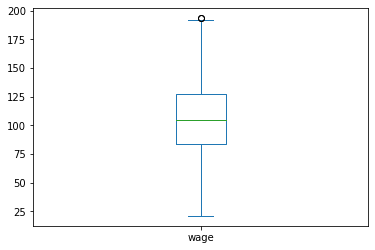

In [50]:
df1["wage"].plot(kind = "box")
plt.show()

In [51]:
df1 = treat_outliers(df,"logwage")

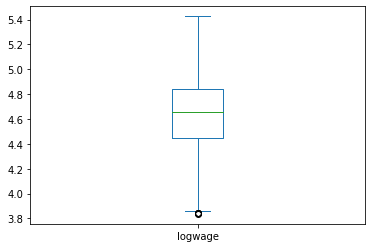

In [52]:
df1["logwage"].plot(kind = "box")
plt.show()

### The outliers treated

In [56]:
df1.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_af,wage_af,age_log,wage_log
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,4.242641,8.662745,2.890372,4.318063
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,4.898979,8.395000,3.178054,4.255273
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,6.708204,11.444745,3.806662,4.875061
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,6.557439,12.437254,3.761200,5.041393
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,7.071068,8.662745,3.912023,4.318063


In [61]:
corr_matrix = df1.corr()

In [62]:
upper =corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

C:\Users\Salma\AppData\Local\Temp/ipykernel_14768/1534884216.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper =corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [63]:
upper

,year,age,logwage,wage,age_af,wage_af,age_log,wage_log
year,NaN,0.042288,0.075208,0.073442,0.039795,0.074603,0.037013,0.075208
age,NaN,NaN,0.211299,0.199628,0.996461,0.206514,0.985666,0.211299
logwage,NaN,NaN,NaN,0.983431,0.232031,0.995741,0.251828,1.000000
wage,NaN,NaN,NaN,NaN,0.219044,0.995920,0.237379,0.983431
age_af,NaN,NaN,NaN,NaN,NaN,0.226675,0.996329,0.232031
wage_af,NaN,NaN,NaN,NaN,NaN,NaN,0.245816,0.995741
age_log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251828
wage_log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
to_drop=[column for column in upper.columns if  any(upper[column]>0.8) or any(upper[column]<-0.8)]
to_drop

['wage', 'age_af', 'wage_af', 'age_log', 'wage_log']

In [66]:
df1=df.drop(columns=['wage'],inplace= True)